In [133]:
from dash import Dash, html, dcc, callback, Output, Input, dash_table
import plotly.express as px
from plotly.subplots import make_subplots
import pickle
import re
import numpy as np
import pandas as pd

with open('evaluation_full.pkl', 'rb') as f:
    df = pickle.load(f)
    
with open('evaluation_roc.pkl', 'rb') as f:
    df_roc = pickle.load(f)

In [134]:
tasks_and_data_sizes = {task: list(data_sizes.keys()) for task, data_sizes in df_roc.items()}

tasks = []
for task, size in tasks_and_data_sizes.items():
    if task.startswith('Base_Phi'):
        if len(size) == 7:
            tasks.append(task)

In [135]:
groups = {
    'RF': ['Tf-Idf Embedding Random Forest', 'TinyBert Embedding Random Forest', 
           'Bert Embedding Random Forest', 'Distilbert Embedding Random Forest', 
           'RoBERTa Embedding Random Forest'],
    'SVM': ['Tf-Idf Embedding SVM', 'TinyBert Embedding SVM', 
            'Bert Embedding SVM', 'Distilbert Embedding SVM', 
            'RoBERTa Embedding SVM'],
    'MLP': ['Tf-Idf Embedding Simple NN', 'TinyBert Embedding Simple NN', 
           'Bert Embedding Simple NN', 'Distilbert Embedding Simple NN', 
           'RoBERTa Embedding Simple NN'],
    'LR': ['Tf-Idf Embedding Logistic Regression', 'TinyBert Embedding Logistic Regression', 
           'Bert Embedding Logistic Regression', 'Distilbert Embedding Logistic Regression', 
           'RoBERTa Embedding Logistic Regression'],
    'IF': ['Tf-Idf Outlier generic', 'TinyBert Outlier generic', 
                'Bert Outlier generic', 'Distilbert Outlier generic', 
                'RoBERTa Outlier generic'],
    'Bert': ['Bert Rejector generic'],
    'TBert': ['TinyBert Rejector generic'],
    'RBert': ['RoBERTa Rejector generic'],
    'DBert': ['Distilbert Rejector generic']
}

In [136]:
temp_array = []
sizes = [500, 1000, 2000, 4000, 6000, 8000, 10000]
for task in tasks:
    for size in sizes:
        for group in groups.keys():
            models = groups[group]
            for model in models:
                roc = df_roc[task][size][model]['roc_auc']
                temp_array.append([group, roc, size])

temp_df = pd.DataFrame(temp_array, columns=['method', 'roc', 'size'])

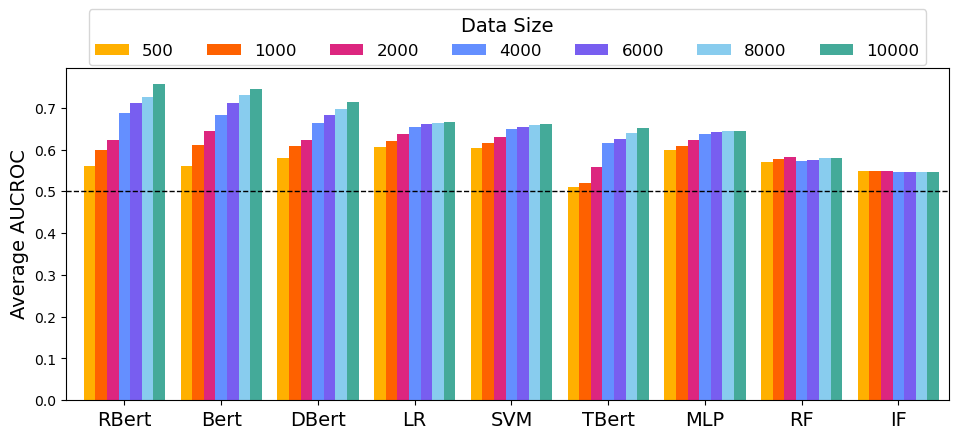

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
grouped = temp_df.groupby(["method", "size"]).agg(roc_mean=("roc", "mean"), roc_std=("roc", "std")).reset_index()

largest_size = 10000
df_max_size = grouped[grouped["size"] == largest_size].copy()
df_max_size.sort_values("roc_mean", ascending=False, inplace=True)
sorted_methods = df_max_size["method"].tolist()
sizes = sorted(grouped["size"].unique())

colors = sns.color_palette("Set2", n_colors=len(sizes))
colors = ['#FFB000', '#FE6100', '#DC267F', '#648FFF', '#785EF0', '#88CCEE', '#44AA99']

fig, ax = plt.subplots(figsize=(10, 5))

N = len(sorted_methods)
M = len(sizes)
bar_width = 0.12
x = np.arange(N)

for i, size in enumerate(sizes):
    offset = (i - M/2) * bar_width + bar_width/2
    
    roc_means = []
    for method in sorted_methods:
        row = grouped[(grouped["method"] == method) & (grouped["size"] == size)]
        if not row.empty:
            roc_means.append(row["roc_mean"].values[0])
        else:
            roc_means.append(np.nan)
    
    ax.bar(
        x + offset,
        roc_means,
        width=bar_width,
        color=colors[i],
        label=f"{size}"
    )

ax.axhline(
    y=0.5,                 
    color='black',      
    linestyle='--',       
    linewidth=1 #,label='Baseline (AUCROC = 0.5)'
)

ax.set_xticks(x)
ax.set_xticklabels(sorted_methods, rotation=0, ha="center", fontsize=14)

#ax.set_xlabel("Model (method)")
ax.set_ylabel("Average AUCROC", fontsize=14)

ax.set_xlim(-bar_width*5, N - 0.6 + bar_width)

ax.legend(
    title="Data Size",
    loc="upper center",
    bbox_to_anchor=(0.5, 1.2),
    ncol=len(sizes),
    title_fontsize=14, 
    fontsize=12
)

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.savefig('exp2', dpi=300, bbox_inches='tight') 
plt.show()

In [143]:
grouped['roc_mean'] = grouped['roc_mean'].round(3)
grouped['roc_std'] = grouped['roc_std'].round(3)

In [163]:
grouped[grouped['method'] == 'IF']

,method,size,roc_mean,roc_std
14,IF,500,0.548,0.056
15,IF,1000,0.549,0.056
16,IF,2000,0.548,0.056
17,IF,4000,0.547,0.050
18,IF,6000,0.546,0.052
19,IF,8000,0.547,0.051
20,IF,10000,0.545,0.051


In [185]:
temp_df['size'].unique()

array([  500,  1000,  2000,  4000,  6000,  8000, 10000])

In [187]:
29*7*13

2639

In [ ]:
rf
svm
mlp
if
lr

tbert
dbert
rbert
bert